## Import Libraries and Database

In [2]:
! pip install wfdb
! pip install neurokit2

In [1]:
import neurokit2 as nk2
import wfdb

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [5]:
# MIMIC info
database_name = 'mimic3wdb/1.0' # The name of the MIMIC IV Waveform Database on Physionet

# Segment for analysis
segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', 
                 '82439920_0004', '82800131_0002', '84304393_0001', 
                 '89464742_0001', '88958796_0004', '88995377_0001', 
                 '85230771_0004', '86643930_0004', '81250824_0005', 
                 '87706224_0003', '83058614_0005', '82803505_0017', 
                 '88574629_0001', '87867111_0012', '84560969_0001', 
                 '87562386_0001', '88685937_0001', '86120311_0001', 
                 '89866183_0014', '89068160_0002', '86380383_0001', 
                 '85078610_0008', '87702634_0007', '84686667_0002', 
                 '84802706_0002', '81811182_0004', '84421559_0005', 
                 '88221516_0007', '80057524_0005', '84209926_0018', 
                 '83959636_0010', '89989722_0016', '89225487_0007', 
                 '84391267_0001', '80889556_0002', '85250558_0011', 
                 '84567505_0005', '85814172_0007', '88884866_0005', 
                 '80497954_0012', '80666640_0014', '84939605_0004', 
                 '82141753_0018', '86874920_0014', '84505262_0010', 
                 '86288257_0001', '89699401_0001', '88537698_0013', 
                 '83958172_0001']

segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 
                'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 
                'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 
                'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 
                'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 
                'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 
                'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 
                'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 
                'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p180/p18080257/84939605', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']


# Key Functions

All functions are derived from the original PPG work done by Elisa Mejía Mejía.

In [6]:
start_seconds = 100 # time since the start of the segment at which to begin extracting data
no_seconds_to_load = 60
  
rel_segment_no = 3
rel_segment_name = segment_names[rel_segment_no]
rel_segment_dir = segment_dirs[rel_segment_no]

sig, meta = wfdb.rdsamp(record_name=rel_segment_name, 
                          pn_dir=rel_segment_dir, 
                          sampfrom=0, sampto=100)
fs = round(meta['fs'])

sampfrom = fs*start_seconds
sampto = fs*(start_seconds+no_seconds_to_load)

ppg, fields = wfdb.rdsamp(record_name=rel_segment_name, 
                          pn_dir=rel_segment_dir, 
                          sampfrom=sampfrom, sampto=sampto, 
                          channel_names = ['Pleth']) 

ppg = ppg.squeeze()

## Find peaks

In [7]:
def get_peaks(raw, fs):
  ppg_clean = nk2.ppg_clean(raw, sampling_rate=fs)
  peaks = nk2.ppg_findpeaks(ppg_clean, method="bishop", show=False)  
  return peaks['PPG_Peaks'][0]

In [8]:
peaks = get_peaks(ppg, fs)

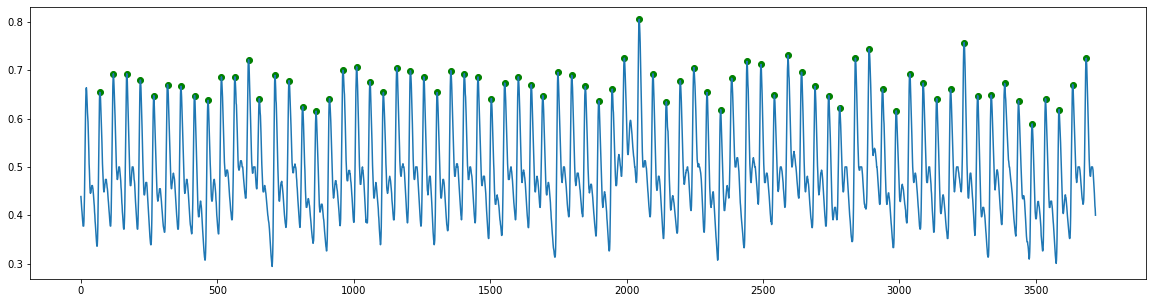

In [9]:
plt.figure(figsize=(20,5))
plt.plot(ppg)
heights = ppg[peaks]
plt.scatter(peaks, heights, marker='o', color='green')

## Find Onsets

In [10]:
def get_onsets(ppg, pks, fs):
    ons = np.empty(0)
    for i in range(len(pks) - 1):
        start = pks[i]
        stop = pks[i + 1]
        ibi = ppg[start:stop]
        aux_ons = np.argmin(ibi)
        # aux_ons, = np.where(ibi == np.min(ibi))
        ind_ons = aux_ons.astype(int)
        ons = np.append(ons, ind_ons + start)   

    ons = ons.astype(int)
    return ons

In [11]:
peaks = get_peaks(ppg, fs)
onsets = get_onsets(ppg, peaks, fs)

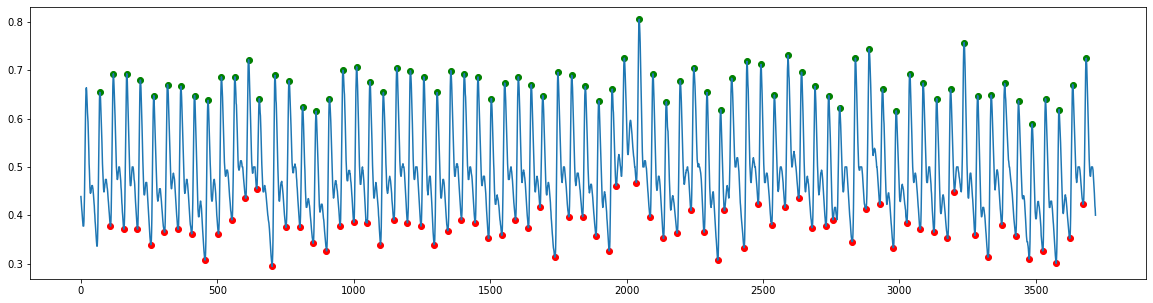

In [12]:
plt.figure(figsize=(20,5))
plt.plot(ppg)
heights_peaks = ppg[peaks]
heights_onsets = ppg[onsets]
plt.scatter(peaks, heights_peaks, marker='o', color='green')
plt.scatter(onsets, heights_onsets, marker='o', color='red')

## Find Diastolic peak and Dicrotic notch

### Differentiation Demo

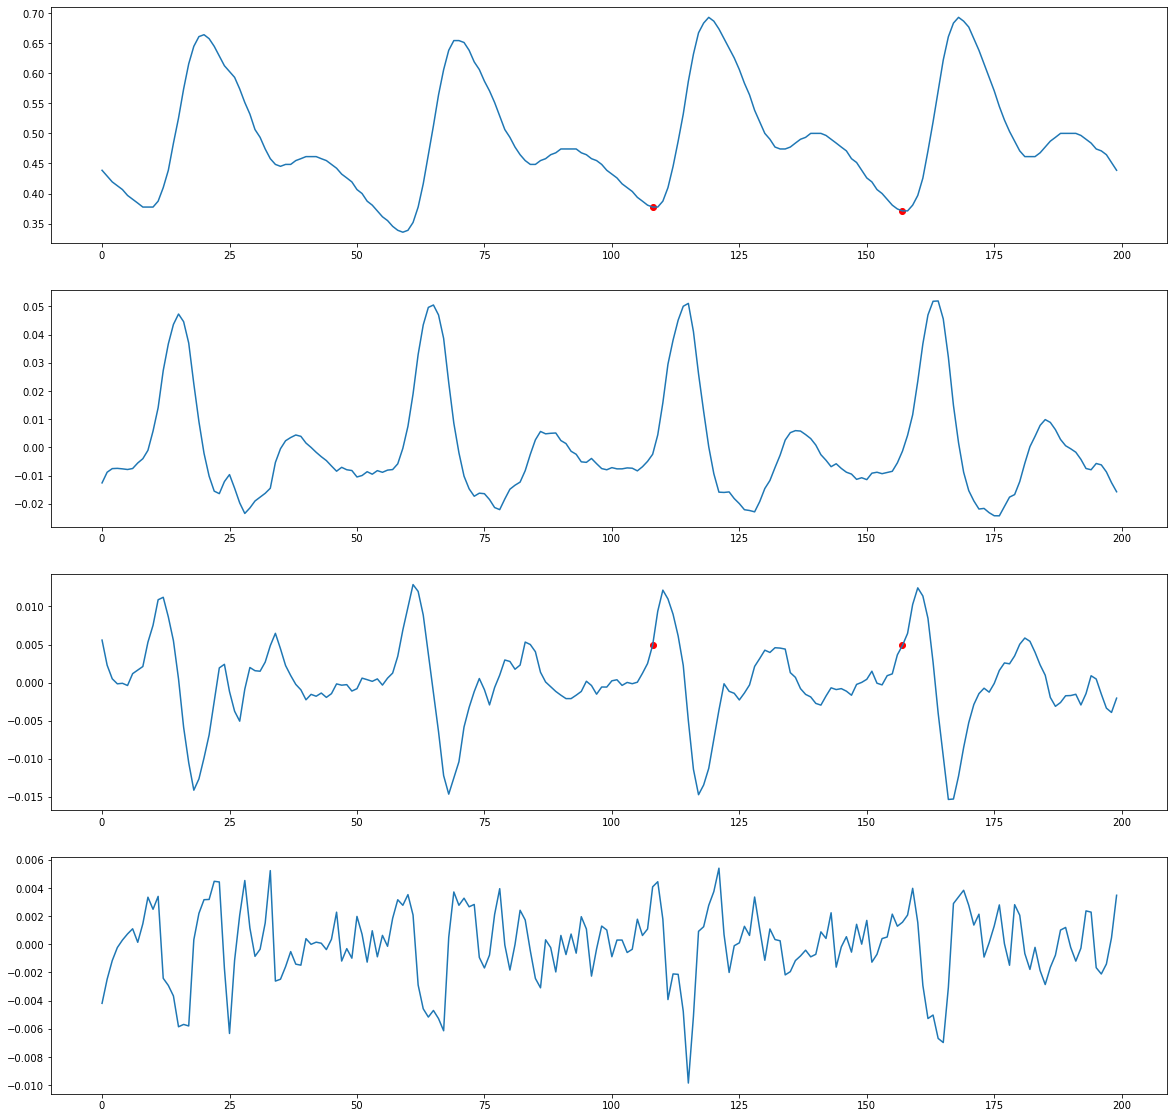

In [23]:
ppg_seg = ppg[0:200]
seg_peaks = get_peaks(ppg_seg, fs)
seg_onset = get_onsets(ppg_seg, seg_peaks, fs)
d1x = signal.savgol_filter(ppg_seg, 9, 5, deriv = 1) 
d2x = signal.savgol_filter(ppg_seg, 9, 5, deriv = 2) 
d3x = signal.savgol_filter(ppg_seg, 9, 5, deriv = 3) 
fig, axs = plt.subplots(4, figsize=(20,20))
axs[0].plot(ppg_seg)
axs[0].scatter(seg_onset, ppg_seg[seg_onset], color='red')
axs[1].plot(d1x)
axs[2].plot(d2x)
axs[2].scatter(seg_onset, d2x[seg_onset], color='red')
axs[3].plot(d3x)

### Actual Function

In [24]:
import scipy.signal as sp

def get_dia_dic(ppg, pks, ons, fs):
    d1x = sp.savgol_filter(ppg, 9, 5, deriv = 1) 
    d2x = sp.savgol_filter(ppg, 9, 5, deriv = 2) 
    d3x = sp.savgol_filter(ppg, 9, 5, deriv = 3) 

    dia = np.empty(0)
    dic = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ind_pks = np.intersect1d(np.where(pks < stop), np.where(pks > start))
        if len(ind_pks) != 0:
            ind_pks = ind_pks[0]
            ind_pks = pks[ind_pks]
            ibi_portion = ppg[ind_pks:stop]
            ibi_2d_portion = d2x[ind_pks:stop]
           
            aux_dic, _ = sp.find_peaks(ibi_2d_portion)
            aux_dic = aux_dic.astype(int)
            aux_dia, _ = sp.find_peaks(-ibi_2d_portion)
            aux_dia = aux_dia.astype(int)   
            if len(aux_dic) != 0:
                ind_max, = np.where(ibi_2d_portion[aux_dic] == np.max(ibi_2d_portion[aux_dic]))
                aux_dic_max = aux_dic[ind_max]
                if len(aux_dia) != 0:
                    nearest = aux_dia - aux_dic_max
                    aux_dic = aux_dic_max
                    dic = np.append(dic, (aux_dic + ind_pks).astype(int))
                    
                    ind_dia, = np.where(nearest > 0)
                    aux_dia = aux_dia[ind_dia]
                    nearest = nearest[ind_dia]
                    if len(nearest) != 0:
                        ind_nearest, = np.where(nearest == np.min(nearest))
                        aux_dia = aux_dia[ind_nearest]
                        dia = np.append(dia, (aux_dia + ind_pks).astype(int))
                else:
                    dic = np.append(dic, (aux_dic_max + ind_pks).astype(int))
        
        break
    dia = dia.astype(int)
    dic = dic.astype(int)

    return dia, dic

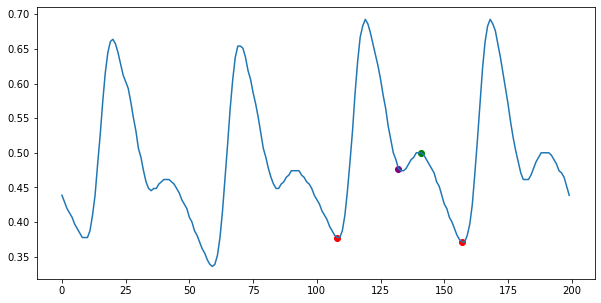

In [25]:
ppg_seg = ppg[0:200]
seg_peaks = get_peaks(ppg_seg, fs)
seg_onset = get_onsets(ppg_seg, seg_peaks, fs)
seg_dia, seg_dic = get_dia_dic(ppg_seg, seg_peaks, seg_onset, fs)
plt.figure(figsize=(10,5))
plt.plot(ppg_seg)
plt.scatter(seg_onset, ppg_seg[seg_onset], color='red')
plt.scatter(seg_dia, ppg_seg[seg_dia], color='green')
plt.scatter(seg_dic, ppg_seg[seg_dic], color='purple')

## Run BP Estimation

In [26]:
def get_fids(ppg, fs):
  pks = get_peaks(ppg, fs)
  ons = get_onsets(ppg, pks, fs)
  dia, dic = get_dia_dic(ppg, pks, ons, fs)
  return pks, ons, dia, dic

In [27]:
def get_signal(rel_segment_no, label, start_sec, len_sec):
  if label == 'ppg':
    chan = 'Pleth'
  elif label == 'bp':
    chan = 'ABP'
  rel_segment_name = segment_names[rel_segment_no]
  rel_segment_dir = segment_dirs[rel_segment_no]

  sig, meta = wfdb.rdsamp(record_name=rel_segment_name, 
                            pn_dir=rel_segment_dir, 
                            sampfrom=0, sampto=100)
  fs = round(meta['fs'])

  sampfrom = fs*start_sec
  sampto = fs*(start_sec + len_sec)

  req_sig, fields = wfdb.rdsamp(record_name=rel_segment_name, 
                            pn_dir=rel_segment_dir, 
                            sampfrom=sampfrom, sampto=sampto, 
                            channel_names = [chan]) 
  req_sig = req_sig.squeeze()

  return req_sig, fs

In [28]:
def get_less_closest(array, value):
  array = np.array(array)
  index, arr = np.argwhere(array<value), array[array<value]
  idx = (np.abs(arr - value)).argmin()
  return array[index[idx]]

In [29]:
def remove_nan(sig):
    nan_ind= np.argwhere(np.isnan(sig)) 
    return np.delete(sig, nan_ind)

#### Test Example

In [30]:
dias = [467,505,617,679,747,825,923,982,1065,1147,1225,1302,1378,1460,1540,1616,1703,1776,1853,1933,2010,2096,2179,2250,2331,2407,2487,2563,2642,2716,2800,2875,2961,3031,3111,3190,3292,3342,3418,3496,3576]
pks = [326,407,487,568,648,728,809,889,968,1047,1127,1206,1285,1363,1443,1521,1601,1680,1758,1838,1917,1996,2075,2154,2233,2312,2390,2469,2547,2625,2704,2781,2860,2938,3016,3093,3170,3247,3326,3404,3482,3559,3636]

peaks = [get_less_closest(pks, dia)[0] for dia in dias]
delta_t = np.subtract(peaks, dias)

delta_t

array([-60, -18, -49, -31, -19, -16, -34, -14, -18, -20, -19, -17, -15,
       -17, -19, -15, -23, -18, -15, -16, -14, -21, -25, -17, -19, -17,
       -18, -16, -17, -12, -19, -15, -23, -15, -18, -20, -45, -16, -14,
       -14, -17])

### Get delta_t and bp example

In [31]:
ppg, fs = get_signal(3, 'ppg', 100, 60)
ppg = remove_nan(ppg)
pks, ons, dias, dics = get_fids(ppg, fs)

In [32]:
corrs_peaks = [get_less_closest(pks, dia)[0] for dia in dias]
delta_t = np.subtract(dias, corrs_peaks)/fs

In [33]:
bp, fs = get_signal(3, 'bp', 100, 60)
bp = remove_nan(bp)
pks = get_peaks(bp, fs)
ons = get_onsets(bp, pks, fs)

sbp = np.median(bp[pks])
dbp = np.median(bp[ons])

print(np.mean(delta_t), sbp, dbp)

0.3548387096774194 118.84375 64.0625



### Get training set

In [34]:
len(segment_names)

52

In [35]:
import pandas as pd

In [36]:
train_set = pd.DataFrame(np.nan, 
                         columns = ['id', 
                                    'pk_to_dia', 'pk_to_dic', 
                                    'on_to_pk', 'on_to_dia', 'on_to_dic',
                                    'peak_len', 
                                    'peak_h', 'dia_h', 'dic_h', 'on_h',
                                    'sbp', 'dbp'], 
                         index = list(range(0,100)))
train_set['id'] = train_set['id'].astype(str)

In [37]:
train_set = pd.read_csv('res.csv').set_index('Unnamed: 0')
train_set = train_set.dropna()

FileNotFoundError: [Errno 2] No such file or directory: 'res.csv'

In [ ]:
train_set.shape

(370, 5)

In [44]:
intv = 60
i = 0
for start in range(40, 800, 60):
    print('Curr start time:{}'.format(start))
    for no in range(40, 52):
        print('Curr subj no:{}'.format(no))
        print(' - getting PPG data')
        ppg, fs = get_signal(no, 'ppg', start, intv)
        print(' - removing nans from PPG')
        ppg = remove_nan(ppg)
        print(' - analysing PPG')
        pks, ons, dias, dics = get_fids(ppg, fs)
        print(' - refining PPG analyses')
        on_pks = [get_less_closest(ons, pk)[0] for pk in pks[1:]]
        on_to_p = np.subtract(pks[1:], on_pks)/fs
        on_dia = [get_less_closest(ons, dia)[0] for dia in dias]
        on_to_dia = np.subtract(dias, on_dia)/fs
        on_dic = [get_less_closest(ons, dic)[0] for dic in dics]
        on_to_dic = np.subtract(dics, on_dic)/fs

        dia_pks = [get_less_closest(pks, dia)[0] for dia in dias]
        p_to_dia = np.subtract(dias, dia_pks)/fs
        dic_pks = [get_less_closest(pks, dic)[0] for dic in dics]
        p_to_dic = np.subtract(dics, dic_pks)/fs
        print(' - getting BP data')
        bp, fs = get_signal(no, 'bp', start, intv)
        print(' - removing nans from BP')
        bp = remove_nan(bp)
        print(' - analysing BP')
        pks = get_peaks(bp, fs)
        ons = get_onsets(bp, pks, fs)

        sbp = np.median(bp[pks])
        dbp = np.median(bp[ons])

        print(' - storing data')
        train_set.at[i, 'id'] = str(no)+'-'+str(start)+'-'+str(intv)
        train_set.at[i, 'on_to_pk'] = np.mean(on_to_p)
        train_set.at[i, 'on_to_dia'] = np.mean(on_to_dia)
        train_set.at[i, 'on_to_dic'] = np.mean(on_to_dic)

        train_set.at[i, 'pk_to_dia'] = np.mean(p_to_dia)
        train_set.at[i, 'pk_to_dic'] = np.mean(p_to_dic)

        train_set.at[i, 'peak_h'] = np.mean(ppg[pks])
        train_set.at[i, 'dia_h'] = np.mean(ppg[dias])
        train_set.at[i, 'dic_h'] = np.mean(ppg[dics])
        train_set.at[i, 'on_h'] = np.mean(ppg[ons])

        train_set.at[i, 'peak_len'] = np.mean(np.diff(pks)/fs)
        train_set.at[i, 'sbp'] = sbp
        train_set.at[i, 'dbp'] = dbp

        i += 1


Curr start time:40
Curr subj no:40
 - getting PPG data
 - removing nans from PPG
 - analysing PPG
 - refining PPG analyses
 - getting BP data
 - removing nans from BP
 - analysing BP
 - storing data
Curr subj no:41
 - getting PPG data
 - removing nans from PPG
 - analysing PPG
 - refining PPG analyses
 - getting BP data
 - removing nans from BP
 - analysing BP
 - storing data
Curr subj no:42
 - getting PPG data


KeyboardInterrupt: 

In [ ]:
test_set

,id,pk_to_dia,pk_to_dic,on_to_pk,on_to_dia,on_to_dic,peak_len,peak_h,dia_h,dic_h,on_h,sbp,dbp
Unnamed: 0,,,,,,,,,,,,,
0,1-40-60,0.209677,0.161290,0.358781,0.483871,0.435484,1.282258,0.289317,0.491211,0.546875,0.297408,113.75000,40.90625
2,3-40-60,0.338710,0.225806,0.184612,0.516129,0.403226,0.794246,0.412357,0.544922,0.515869,0.480327,118.00000,63.71875
3,4-40-60,0.209677,0.161290,0.188054,0.354839,0.306452,2.086849,0.420392,0.480225,0.493652,0.469651,91.81250,68.40625
5,6-40-60,0.161290,0.064516,0.696885,2.225806,2.129032,0.641616,0.455235,0.586426,0.627197,0.498803,85.06250,52.68750
6,7-40-60,0.241935,0.112903,0.206452,0.451613,0.322581,0.723019,0.404934,0.451660,0.459473,0.481081,102.93750,53.75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,5-640-60,0.258065,0.225806,0.218203,0.483871,0.451613,0.783871,0.371592,0.559326,0.590576,0.469294,93.06250,37.68750
395,6-640-60,0.838710,0.774194,0.398185,1.032258,0.967742,1.217570,0.423503,0.329834,0.353027,0.418488,115.21875,61.18750
396,7-640-60,0.145161,0.112903,0.194556,0.322581,0.290323,0.734274,0.349453,0.499023,0.541260,0.400525,89.12500,46.87500


In [ ]:
train_set.to_csv('train_res.csv')

In [ ]:
train_set.to_csv('/content/drive/MyDrive/ppg/test.csv')

## Run Linear Regression

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/ppg/train.csv').set_index('Unnamed: 0')
train_set = train_set.dropna()

test_set = pd.read_csv('/content/drive/MyDrive/ppg/test.csv').set_index('Unnamed: 0')
test_set = test_set.dropna()

In [ ]:
train_set.shape, test_set.shape

((370, 13), (101, 13))

In [ ]:
features = ['pk_to_dia', 'pk_to_dic',
            'on_to_pk', 'on_to_dia', 'on_to_dic',
            'peak_len', 
            'peak_h', 'dia_h', 'dic_h', 'on_h']
X, X_test = train_set[features].to_numpy(), test_set[features].to_numpy()
y, y_test = train_set['dbp'].to_numpy(), test_set['dbp'].to_numpy()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_, reg.intercept_)

y_pred = reg.predict(X_test)

0.034304453707100224
[ 25.48010557 -19.564318     4.69677986  18.43585945 -26.60856413
   9.29177474  34.57955967 -16.47285566  20.42310903  52.57408263] 11.048954143308158


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

24792.72177656143

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X, y)
print(regr.score(X, y))
pred = regr.predict(X_test)

0.8484705022781107


In [ ]:
mean_squared_error(y_test, pred)

27637.997236108644